## Instructions

# Final Report Description

**Due:** June 22 @ 11 : 59 p.m.  
**Points:** 100 (worth 3 % of course grade)



---

## 1 · Project Overview
You will complete an **end-to-end data-science project** in a Jupyter notebook and write up your work *in the same notebook* using Markdown cells.  
The notebook must:

1. **Download** the dataset.  
2. **Wrangle / clean** it reproducibly.  
3. **Summarize & visualize** the data.  
4. **Answer one predictive question** with an appropriate model.  
5. **Narrate** your choices, methods, and conclusions clearly in Markdown.

---

## 2 · Problem Context
A UBC CS research group (PLAI, PI Frank Wood) is studying Minecraft game-play logs. They need insight to:

| Broad Question | Purpose |
| --- | --- |
| **Q1 – Newsletter subscriptions** | Which player traits/behaviours predict opting into a game-related newsletter? |
| **Q2 – High-data contributors** | Which “kinds” of players are likeliest to generate large data volumes? |
| **Q3 – Demand forecasting** | Which time windows will see heavy simultaneous usage (to size licences/servers)? |

Choose **one** of the three, turn it into a **specific, well-posed predictive question**, and answer it.

---

## 3 · The Data

| File | Contents |
| --- | --- |
| `players.csv` | One row = one unique player (demographics, baseline traits, etc.). |
| `sessions.csv` | One row = one play session (timestamps, actions, session-level metrics). |

---

## 4 · Report Structure (≤ 2000 words, excl. citations)

### 4.1 Title
A concise, informative project title.

### 4.2 Introduction
1. **Background** – enough context for an unfamiliar reader.  
2. **Question(s)** – state your predictive question (identify one response variable + ≥ 1 explanatory variable).  
3. **Data Description** – full descriptive summary:  
   * # observations & variables  
   * Variable names, types, and meanings  
   * Summary stats, missing-value issues, collection method, potential biases  
   * Clear bullet list and/or table of variables

### 4.3 Methods & Results
* **Data Loading & Wrangling** – code that reproducibly prepares the data.  
* **Exploratory Analysis** – relevant summaries and *high-quality* visualizations (titles, labels, units). Comment on insights from plots.  
* **Modeling & Evaluation** – explain and implement the method used:  
  * Why is it appropriate?  
  * Required assumptions?  
  * Limitations / weaknesses?  
  * How you tuned / compared models (train/test split, validation set, cross-validation, etc.).  
* **Analysis Visualizations** – numbered figures with legends.

### 4.4 Discussion
* Summarize key findings and whether they matched expectations.  
* Potential impact / practical implications.  
* Future questions or next steps.

### 4.5 References
List any external sources in a consistent citation style.

---

## 5 · Submission Checklist (Gradescope)

| Required Item | Notes |
| --- | --- |
| **PDF** | Exported from your notebook *and* containing a link to your public GitHub repo. |
| **`.ipynb` file** | Runs top-to-bottom with **no extra files** needed. |

---

## 6 · GitHub Requirements
* Public repository with **≥ 5 commits**, each with descriptive messages.

---

## 7 · Grading Rubric (100 pts)

| Category | Max | Highlights of “Excellent” level |
| --- | --- | --- |
| **Mechanics** | 10 | Self-contained; notebook & output render run flawlessly; all libraries clearly identified. |
| **Reasoning / Technical Work** | 70 | Creative, well-posed question; correct & justified method; flawless argumentation; clear structure; well-labeled figures. |
| **Writing Quality** | 20 | No grammar/spelling errors; concise; word/page limits respected. |

---

### Quick Tips for Full Credit
1. **Reproducibility first** – verify the notebook runs cleanly on a fresh kernel.  
2. **Clean narrative flow** – Markdown should lead the reader logically from question → data → analysis → conclusion.  
3. **Figure polish** – meaningful titles, labeled axes, readable legends.  
4. **Model justification** – state assumptions, show validation metrics, acknowledge limitations.  
5. **Commit early & often** – document your process in Git.
6. 

# Report

## Import Libraries

In [2]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
sessions_raw <- read_csv("data/sessions.csv")
sessions_raw


In [11]:
# library(tidyverse)   # readr, dplyr, purrr, ggplot2
# library(lubridate)   # dmy_hm(), floor_date(), etc.

# # 1. Read the raw file  ──────────────────────────────────────────────
# sessions_raw <- read_csv("data/sessions.csv")   # keeps the original column names

# # Optional: rename with base-R (still on the sheet) so code is easier to read
# names(sessions) <- c(
#   "hashed_email",          # was hashedEmail
#   "start_time",            # timestamp dd/mm/yyyy HH:MM
#   "end_time",              # timestamp dd/mm/yyyy HH:MM
#   "original_start_time",   # epoch*1000
#   "original_end_time"      # epoch*1000
# )

# # 2. Parse timestamps (convert from character → POSIXct)  ────────────
# sessions <- sessions |>
#   mutate(
#     start_time = dmy_hm(start_time, tz = "UTC"),
#     end_time   = dmy_hm(end_time,   tz = "UTC")
#   ) |>
#   filter(!is.na(start_time) & !is.na(end_time) & end_time >= start_time)

# # 3. Expand each session into the hours it covers  ───────────────────
# sessions_long <- sessions |>
#   mutate(
#     hour_seq = map2(
#       start_time, end_time,
#       ~ seq(
#           floor_date(.x, "hour"),     # first full hour
#           floor_date(.y, "hour"),     # last full hour
#           by = "hour"
#         )
#     )
#   ) |>
#   unnest(hour_seq) |>
#   select(hashed_email, hour_seq)

# # sessions_long is now ready for `count(hour_seq, name = "concurrent_players")`

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


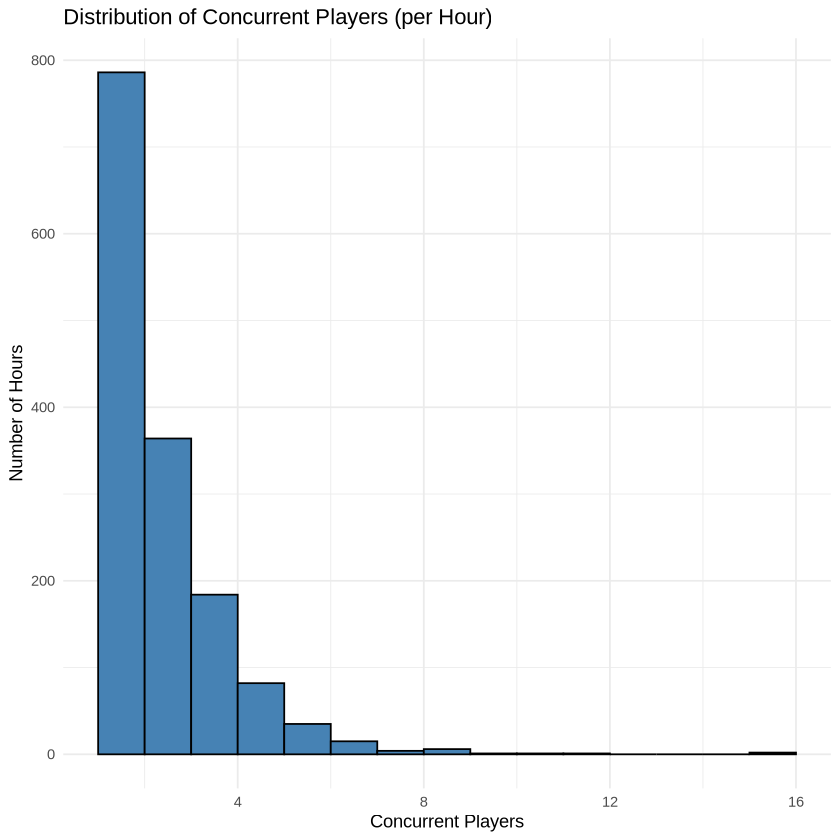

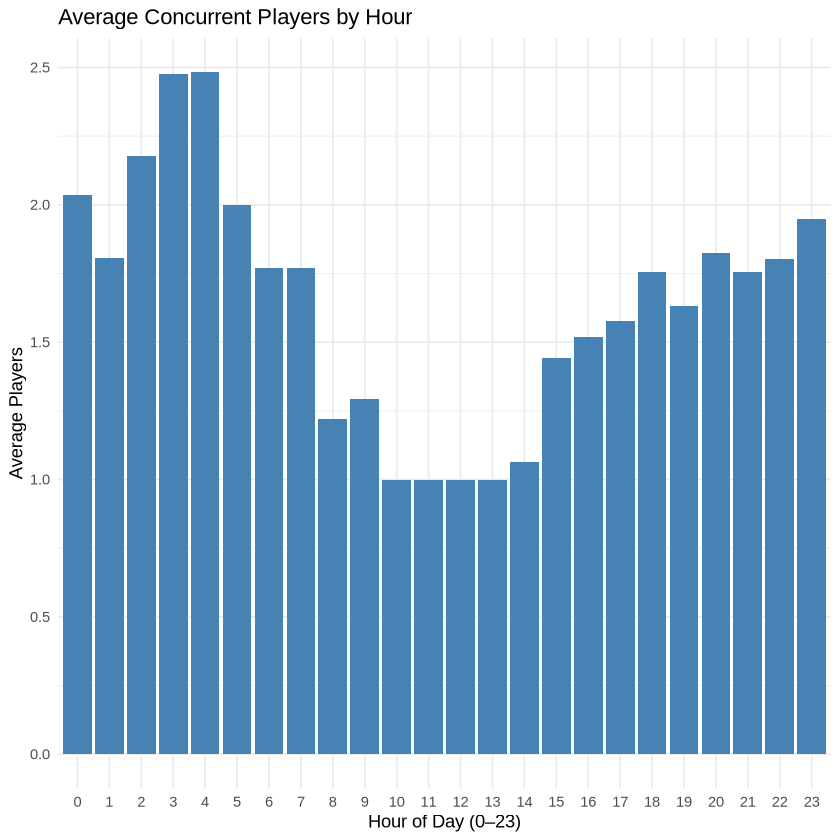

In [13]:
###############################################################################
## Minecraft Demand-Forecast Workflow (R) — single, self-contained script    ##
## Only uses functions on the DSCI 100 reference sheet                      ##
###############################################################################

# 0. Libraries ---------------------------------------------------------------
library(tidyverse)   # readr, dplyr, tidyr, purrr, ggplot2
library(lubridate)   # dmy_hm(), floor_date(), hour(), wday()

# 1. Read raw sessions file --------------------------------------------------
sessions <- read_csv("data/sessions.csv")          # original column names stay

# (optional) Rename for convenience with base-R names() — still in scope
names(sessions) <- c(
  "hashed_email",
  "start_time",
  "end_time",
  "original_start_time",
  "original_end_time"
)

# 2. Parse timestamps & basic cleaning --------------------------------------
sessions <- sessions |>
  mutate(
    start_time = dmy_hm(start_time, tz = "UTC"),
    end_time   = dmy_hm(end_time,   tz = "UTC")
  ) |>
  filter(!is.na(start_time) & !is.na(end_time) & end_time >= start_time)

# 3. Expand each session to the hours it spans ------------------------------
sessions_long <- sessions |>
  mutate(
    hour_seq = map2(
      start_time, end_time,
      ~ seq(
          floor_date(.x, "hour"),      # first full hour
          floor_date(.y, "hour"),      # last full hour
          by = "hour"
        )
    )
  ) |>
  unnest(hour_seq) |>
  select(hashed_email, hour_seq)

# 4. Count concurrent players per hour --------------------------------------
hourly <- sessions_long |>
  count(hour_seq, name = "concurrent_players") |>
  mutate(
    hour = factor(hour(hour_seq), levels = 0:23, ordered = TRUE)  # 0–23
  )

# 5. Visualizations ----------------------------------------------------------

## 5-A  Histogram of hourly concurrency
hourly |>
  ggplot(aes(x = concurrent_players)) +
  geom_histogram(binwidth = 1, boundary = 0, closed = "left",
                 fill = "steelblue", colour = "black") +
  labs(
    title = "Distribution of Concurrent Players (per Hour)",
    x     = "Concurrent Players",
    y     = "Number of Hours"
  ) +
  theme_minimal()

## 5-B  Average concurrent players by hour-of-day
hourly |>
  group_by(hour) |>
  summarize(avg_players = mean(concurrent_players), .groups = "drop") |>
  ggplot(aes(x = hour, y = avg_players)) +
  geom_col(fill = "steelblue") +
  labs(
    title = "Average Concurrent Players by Hour",
    x     = "Hour of Day (0–23)",
    y     = "Average Players"
  ) +
  theme_minimal()